In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from functools import reduce
import numpy as np
from imgfeature import ImSim
from time import time

In [2]:
df = pd.read_csv('dataset_with_fp_long.csv')

In [79]:
df_search = df[['img_index', 'path']]

df_search.head()

,img_index,path
0,0,images/train/书房_中式传统/1005641_5145421.jpg
1,1,images/train/书房_中式传统/1014492_5201166.jpg
2,2,images/train/书房_中式传统/1016915_5218514.jpg
3,3,images/train/书房_中式传统/1017498_5222363.jpg
4,4,images/train/书房_中式传统/1017498_5222364.jpg


In [27]:
def fp2des(fp):
    kp_num = int(len(fp) / (64))
    ut8arr = np.array([int(fp[i:i+2], 16) for i in range(0, len(fp), 2)], dtype=np.uint8)
    return ut8arr.reshape(kp_num, 32)

In [4]:
imsim = ImSim(k=50)

sim = imsim.calcSim(fp2des(df['fp_long'][113890]), fp2des(df['fp_long'][0]))

sim

0.0

In [52]:
def sim_query(df, img_path):
    des = imsim.getFeature(img_path)[1]
    rows = list()
    for index in df.index:
        row = dict(df.loc[index])
        sim = imsim.calcSim(fp2des(row['fp_long']), des)
        if sim > 0.0001:
            rows.append(dict(img_index=row['img_index'], path=row['path'], sim=sim))
    return rows

In [53]:
start = time()
sims = sim_query(df, df['path'][100000])
print('cost time: {}s'.format(time() - start))

print(sims)

cost time: 100.45982050895691s
[{'img_index': 63441, 'path': 'images/train/客厅_北欧极简/804814_3897668.jpg', 'sim': 0.72}, {'img_index': 97943, 'path': 'images/train/餐厅_北欧极简/1096774_5725878.jpg', 'sim': 0.66}, {'img_index': 99170, 'path': 'images/train/餐厅_北欧极简/522018_2153111.jpg', 'sim': 0.7}, {'img_index': 99834, 'path': 'images/train/餐厅_北欧极简/594735_2608294.jpg', 'sim': 0.58}, {'img_index': 99960, 'path': 'images/train/餐厅_北欧极简/601830_2649315.jpg', 'sim': 0.74}, {'img_index': 100000, 'path': 'images/train/餐厅_北欧极简/605633_2670717.jpg', 'sim': 1.0}, {'img_index': 104624, 'path': 'images/train/餐厅_现代简约/1130562_5927347.jpg', 'sim': 0.64}, {'img_index': 108677, 'path': 'images/train/餐厅_现代简约/580096_2515131.jpg', 'sim': 0.72}, {'img_index': 109338, 'path': 'images/train/餐厅_现代简约/615001_2725105.jpg', 'sim': 0.72}]


In [37]:
from helper import showimg
from PIL import Image
import matplotlib.pyplot as plt

In [42]:
im1 = np.asarray(Image.open(df['path'][100000]))
im2 = np.asarray(Image.open('images/train/客厅_北欧极简/804814_3897668.jpg'))

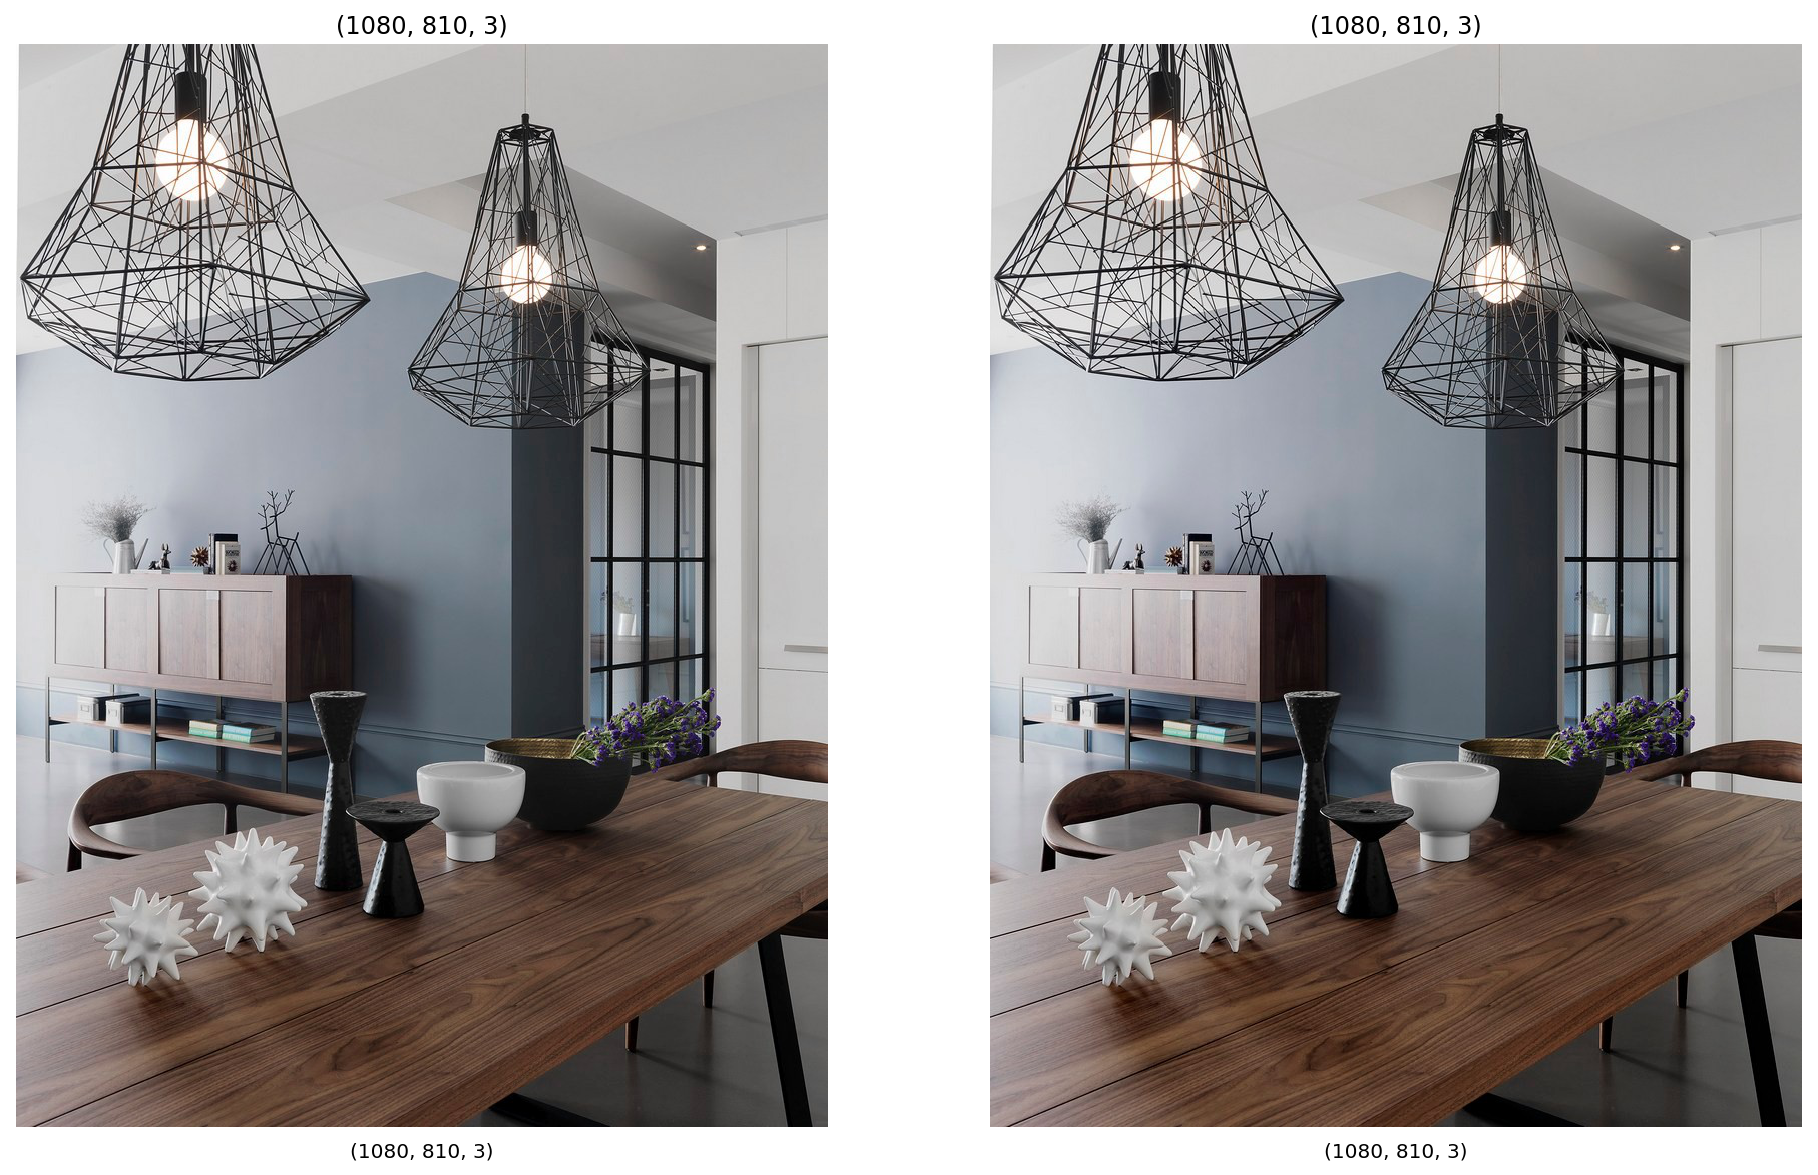

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(16, 12))

showimg(im1, ax=axs[0])
showimg(im2, ax=axs[1])

In [64]:
sims = sorted(sims, key=lambda x:x['sim'], reverse=True)

imgs = np.asarray([np.asarray(Image.open(img_path)) for img_path in list(pd.DataFrame(sims)['path'])])

In [82]:
[(sim['sim'], sim['path'].replace('images/train/', '')) for sim in sims]

[(1.0, '餐厅_北欧极简/605633_2670717.jpg'),
 (0.74, '餐厅_北欧极简/601830_2649315.jpg'),
 (0.72, '客厅_北欧极简/804814_3897668.jpg'),
 (0.72, '餐厅_现代简约/580096_2515131.jpg'),
 (0.72, '餐厅_现代简约/615001_2725105.jpg'),
 (0.7, '餐厅_北欧极简/522018_2153111.jpg'),
 (0.66, '餐厅_北欧极简/1096774_5725878.jpg'),
 (0.64, '餐厅_现代简约/1130562_5927347.jpg'),
 (0.58, '餐厅_北欧极简/594735_2608294.jpg')]

In [83]:
df['path'][100000]

'images/train/餐厅_北欧极简/605633_2670717.jpg'

In [84]:
len(df['path'])

113891